In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf
from pandas_datareader import data as pdr 
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('C:/Users/Kazem Kamrani/Desktop/Time Series Analysis/international-airline-passengers.csv',
                 index_col = 'Month',
                 parse_dates = True)

<AxesSubplot:xlabel='Month'>

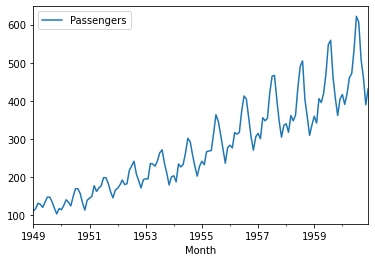

In [3]:
df.plot()

In [4]:
adfuller(df['Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [5]:
# first 2 return values are test-statistic and p-value 

In [6]:
def adf(x):
    res = adfuller(x)
    print("Test-Statistic:", res[0])
    print("P-Value:", res[1])
    if res [1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [7]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060423
P-Value: 0.9918802434376409
Non-Stationary


In [8]:
adf(np.random.randn(100))

Test-Statistic: -8.928847538098964
P-Value: 9.941293610704672e-15
Stationary


In [9]:
adf(np.random.gamma(1,1,100))

Test-Statistic: -4.833533755431047
P-Value: 4.689723541397443e-05
Stationary


In [10]:
df['LogPassengers'] = np.log(df['Passengers'])

In [11]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069714
P-Value: 0.4223667747703857
Non-Stationary


In [12]:
df['Diff'] = df['Passengers'].diff()

<AxesSubplot:xlabel='Month'>

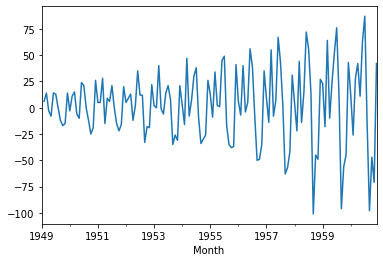

In [13]:
df['Diff'].plot()

In [14]:
adf(df['Diff'].dropna())

Test-Statistic: -2.8292668241699874
P-Value: 0.05421329028382711
Non-Stationary


In [15]:
df['DiffLog'] = df['LogPassengers'].diff()

<AxesSubplot:xlabel='Month'>

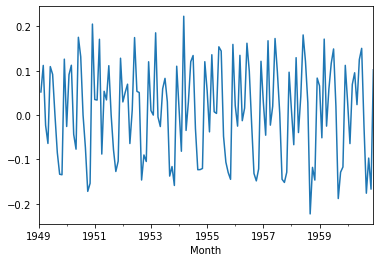

In [16]:
df['DiffLog'].plot()

In [17]:
adf(df['DiffLog'].dropna())

Test-Statistic: -2.717130598388145
P-Value: 0.0711205481508568
Non-Stationary


In [18]:
goog = pdr.get_data_yahoo('goog',start = '2010-01-01', end = '2020-01-01')

In [19]:
goog['LogPrice'] = np.log(goog['Close'])
goog['LogRet'] = goog['LogPrice'].diff()

<AxesSubplot:xlabel='Date'>

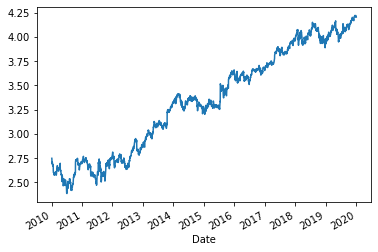

In [20]:
goog['LogPrice'].plot()

In [21]:
adf(goog['LogPrice'].dropna())

Test-Statistic: -0.22524209683400007
P-Value: 0.9354451780567592
Non-Stationary


<AxesSubplot:xlabel='Date'>

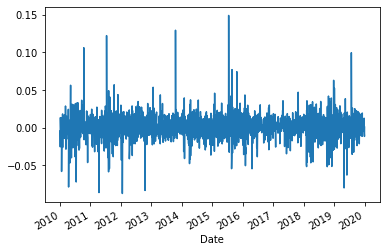

In [22]:
goog['LogRet'].plot()

In [23]:
adf(goog['LogRet'].dropna())

Test-Statistic: -49.44981413443615
P-Value: 0.0
Stationary


In [24]:
EURUSD = pdr.get_data_yahoo('EURUSD=X',start = '2022-01-01')

In [25]:
EURUSD['Ret'] = EURUSD['Close'].diff()
EURUSD['LogClose'] = np.log(EURUSD['Close'])
EURUSD['LogRet'] = EURUSD['LogClose'].diff()
EURUSD

,High,Low,Open,Close,Volume,Adj Close,Ret,LogClose,LogRet
Date,,,,,,,,,
2022-01-03,1.137592,1.128541,1.137385,1.137346,0,1.137346,NaN,0.128697,NaN
2022-01-04,1.132300,1.127345,1.130199,1.130224,0,1.130224,-0.007121,0.122416,-0.006281
2022-01-05,1.134559,1.127764,1.128541,1.128363,0,1.128363,-0.001862,0.120767,-0.001649
2022-01-06,1.133067,1.128554,1.131222,1.131350,0,1.131350,0.002987,0.123411,0.002644
2022-01-07,1.135976,1.129050,1.129586,1.129688,0,1.129688,-0.001662,0.121942,-0.001470
...,...,...,...,...,...,...,...,...,...
2022-07-27,1.023311,1.011572,1.020929,1.020929,0,1.020929,0.007973,0.020713,0.007841
2022-07-28,1.025378,1.014858,1.019233,1.019233,0,1.019233,-0.001696,0.019050,-0.001663
2022-07-31,1.027749,1.020960,1.020825,1.020825,0,1.020825,0.001592,0.020611,0.001561


Test-Statistic: -0.6720234163693114
P-Value: 0.8538636439783371
Non-Stationary


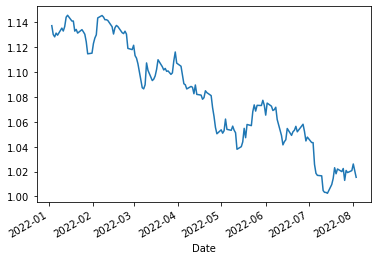

In [26]:
EURUSD['Close'].plot()
adf(EURUSD['Close'])

Test-Statistic: -0.6368567643745272
P-Value: 0.862434568749741
Non-Stationary


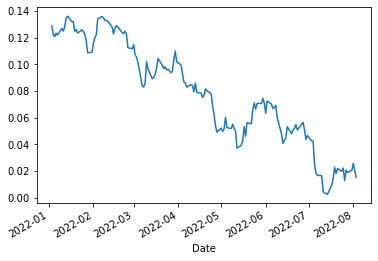

In [27]:
EURUSD['LogClose'].plot()
adf(EURUSD['LogClose'])

Test-Statistic: -11.536807899310551
P-Value: 3.7162638262787465e-21
Stationary


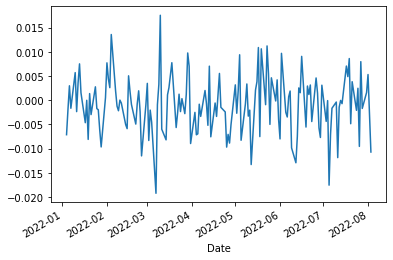

In [28]:
EURUSD['Ret'].plot()
adf(EURUSD['Ret'].dropna())

Test-Statistic: -11.584219605461003
P-Value: 2.893642852288529e-21
Stationary


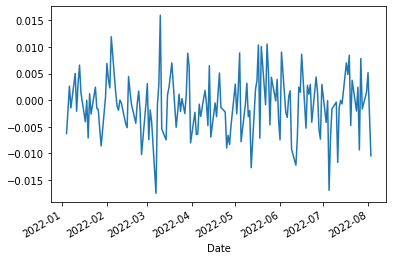

In [29]:
EURUSD['LogRet'].plot()
adf(EURUSD['LogRet'].dropna())

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:


Ntest = 30
train = EURUSD.iloc[:-Ntest]
test = EURUSD.iloc[-Ntest:]

In [32]:
train_idx = EURUSD.index <= train.index[-1]
test_idx = EURUSD.index > train.index[-1]

In [33]:
armia = ARIMA(train['Close'], order=(8,1,1))
arima_result = armia.fit()

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

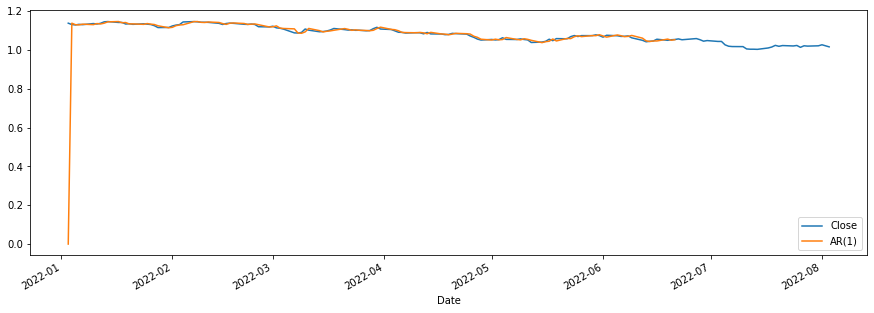

In [34]:
EURUSD.loc[train_idx,'AR(1)'] = arima_result.predict(
    strat = train.index[0], end=train.index[-1])
EURUSD[['Close', 'AR(1)' ]].plot(figsize=(15,5))

In [40]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean


C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


123    1.052958
124    1.052571
125    1.051397
126    1.051534
127    1.052494
128    1.051935
129    1.052091
130    1.052068
131    1.052188
132    1.052289
133    1.052080
134    1.052065
135    1.052148
136    1.052124
137    1.052142
138    1.052105
139    1.052122
140    1.052149
141    1.052129
142    1.052125
143    1.052126
144    1.052128
145    1.052133
146    1.052126
147    1.052126
148    1.052129
149    1.052129
150    1.052129
151    1.052128
152    1.052128
Name: predicted_mean, dtype: float64

<AxesSubplot:>

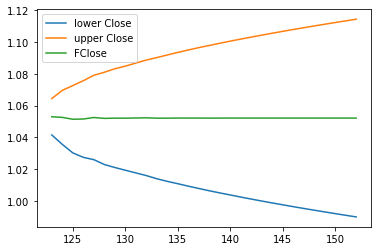

In [49]:
forecastM= prediction_result.conf_int()
forecastM['FClose'] = forecast
forecastM
forecastM.plot()